# Portfolio estimation

Small functions to visualize stock market data and calculate basic portfolio numbers

In [1]:
from pandas_datareader.data import DataReader
from pandas_datareader.moex import MoexReader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from finance import plot_adjusted_price, plot_instruments_correlation, plot_mean_avg, correlation_matrix, getData

sns.set_style("whitegrid")
%matplotlib inline

# LOAD METAL!

In [2]:
# Metals Data from
# https://us.spindices.com/indices/commodities/sp-gsci-industrial-metals
metal_path = "S&P GSCI Industrial Metals.xls"
metal = pd.read_excel(metal_path, header=5, index_col=0)
metal = metal.iloc[:-4]
metal.columns = ["IM_TR", "IM_ER", "IM"]

# LOAD OIL!


In [3]:
# Data from https://www.finam.ru/profile/mosbirzha-fyuchersy/br/export/
path = "SPFB.BR_000101_190301.csv"
oil = pd.read_csv(path, sep=";", index_col="DATE")
oil.index = pd.to_datetime(oil.index, format="%Y%m%d")
oil = oil[["CLOSE"]]
oil.columns = ["BRENT"]

# RTSI Index and RUB/USD rate

In [4]:
symbols= ["RTSI", "USD000UTSTOM"]
start_date = "2009-07-16"
end_date = "2019-03-01"
tickers_data =  getData(symbols, start_date=start_date, end_date=end_date)

RTSI
USD000UTSTOM


# Data preparing

In [5]:
all_data = oil.join(tickers_data)
all_data = all_data.join(metal)
all_data = all_data.fillna(method="ffill").fillna(method="bfill")
USD_RUB = 1 / all_data.pop("USD000UTSTOM")
all_data.pop("IM_TR")  # heavily correlated with IM_ER
pass

In [6]:
all_data.head()

,BRENT,RTSI,IM_ER,IM
DATE,,,,
2009-07-16,64.30,925.00,186.24,285.52
2009-07-17,66.20,925.00,188.54,289.06
2009-07-20,67.39,972.31,189.99,291.27
2009-07-21,67.12,987.69,190.31,291.76
2009-07-22,67.90,963.06,193.68,296.93


In [7]:
all_data.describe()

,BRENT,RTSI,IM_ER,IM
count,2421.000000,2421.000000,2421.000000,2421.000000
mean,81.006390,1265.224073,204.967253,352.601070
std,25.717487,295.257539,39.550609,53.027379
min,28.190000,628.410000,130.630000,236.170000
25%,56.810000,1054.900000,176.680000,324.150000
50%,77.610000,1243.560000,200.070000,349.820000
75%,107.970000,1451.640000,229.740000,383.240000
max,126.910000,2123.560000,309.670000,498.440000


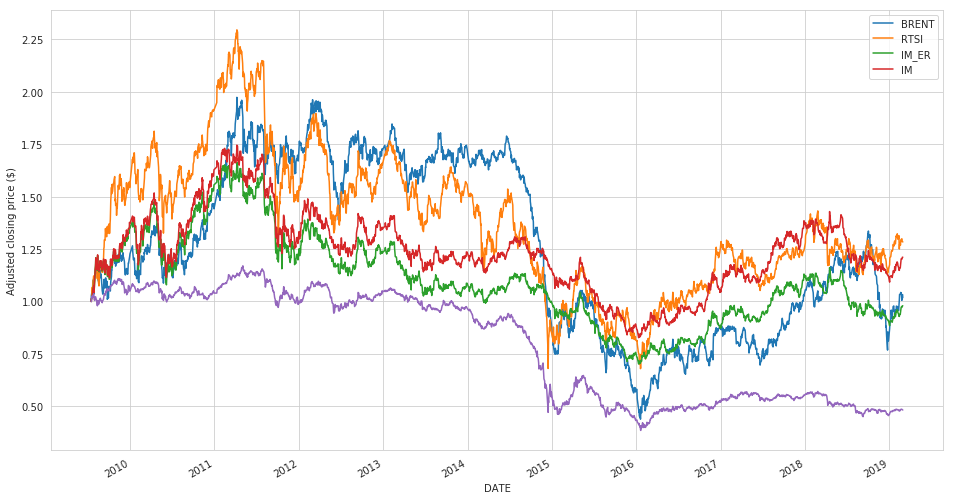

In [8]:
ax = plot_adjusted_price(all_data)
ax.plot(USD_RUB / USD_RUB.iloc[0])

In [9]:
# Normalization
normalization =  all_data.iloc[0, :]
all_data = all_data / normalization

In [10]:
fs = {
    "log": lambda x: 1 + np.log(x),
    "1/": lambda x: 1/x,
}
for col in all_data.columns:
    for key in fs:
        all_data.loc[:, key+col] = fs[key](all_data[col])

In [11]:
all_data

,BRENT,RTSI,IM_ER,IM,1/BRENT,logBRENT,1/RTSI,logRTSI,1/IM_ER,logIM_ER,1/IM,logIM
DATE,,,,,,,,,,,,
2009-07-16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2009-07-17,1.029549,1.000000,1.012350,1.012398,0.971299,1.029121,1.000000,1.000000,0.987801,1.012274,0.987753,1.012322
2009-07-20,1.048056,1.051146,1.020135,1.020139,0.954147,1.046937,0.951343,1.049881,0.980262,1.019935,0.980259,1.019939
2009-07-21,1.043857,1.067773,1.021854,1.021855,0.957986,1.042922,0.936529,1.065575,0.978614,1.021618,0.978613,1.021619
2009-07-22,1.055988,1.041146,1.039948,1.039962,0.946981,1.054476,0.960480,1.040322,0.961586,1.039171,0.961573,1.039184
2009-07-23,1.091757,1.055092,1.053909,1.053937,0.915954,1.087789,0.947785,1.053628,0.948849,1.052506,0.948824,1.052532
2009-07-24,1.101400,1.094724,1.059976,1.060031,0.907936,1.096582,0.913472,1.090503,0.943417,1.058247,0.943369,1.058298
2009-07-27,1.102488,1.121741,1.073346,1.073340,0.907039,1.097570,0.891472,1.114882,0.931666,1.070781,0.931671,1.070775
2009-07-28,1.094090,1.083027,1.062178,1.062202,0.914001,1.089923,0.923338,1.079760,0.941462,1.060321,0.941440,1.060344


In [12]:
X = np.array(all_data)
y = np.array(USD_RUB)
data_size = y.shape[0]
test_size = int(0.2 * data_size)
X_train, y_train, X_test, y_test = X[:-test_size], y[:-test_size], X[-test_size:], y[-test_size:]
print("Test after {}".format(all_data.iloc[-test_size].name))

Test after 2017-04-04 00:00:00


In [13]:
X_train.shape

(1937, 12)

In [14]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [15]:
grid = {
    'alpha': [1e-4], 
    'l1_ratio': [0.5],
    'max_iter': [40000],
    'random_state': [43], 
}

eNet = ElasticNet()
grid_search = GridSearchCV(eNet, grid, scoring="r2", cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_, grid_search.best_score_, )

{'alpha': 0.0001, 'max_iter': 40000, 'random_state': 43, 'l1_ratio': 0.5} -22.9501187341641


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
coeffs = pd.Series(data=grid_search.best_estimator_.coef_, index=all_data.columns[:12]).T
coeffs

BRENT       0.000000
RTSI        0.000000
IM_ER       0.000000
IM         -0.000000
1/BRENT    -0.000000
logBRENT    0.006332
1/RTSI     -0.000000
logRTSI     0.008519
1/IM_ER    -0.014722
logIM_ER    0.000000
1/IM        0.000000
logIM      -0.000000
dtype: float64

In [17]:
y_test_pred = grid_search.predict(X_test)
y_pred = grid_search.predict(X)

In [18]:
all_data["USD_RUB_pred"] = y_pred

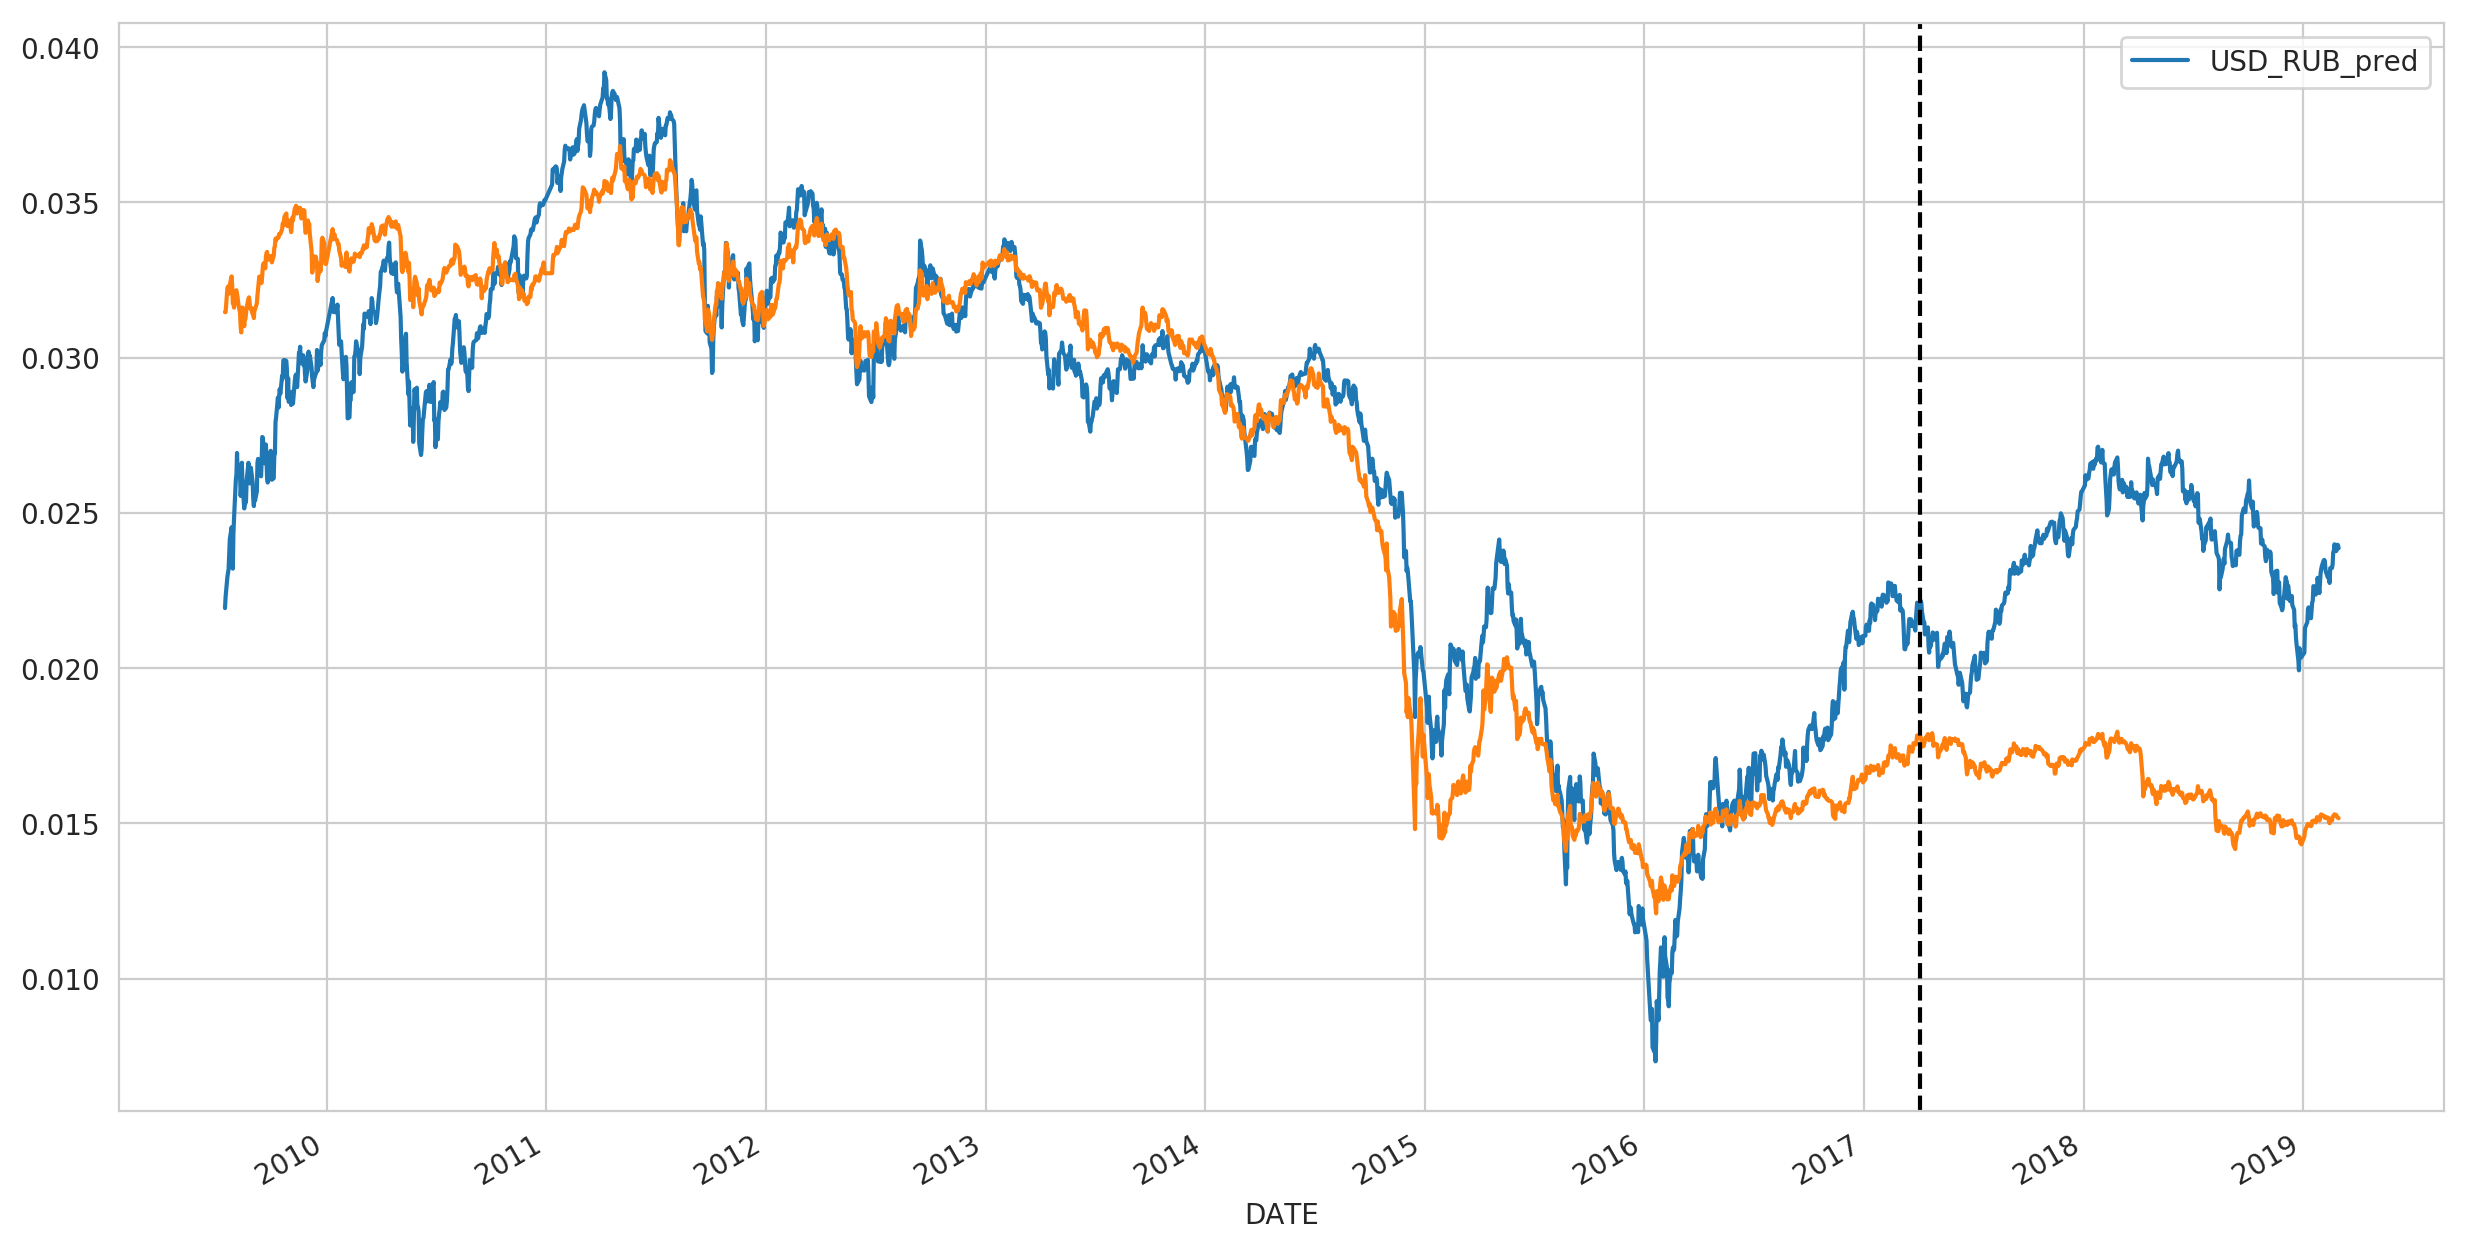

In [19]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = fig.add_subplot(111)
all_data.plot(ax=ax, y="USD_RUB_pred", )
USD_RUB.plot(ax=ax)
ax.axvline(all_data.iloc[-test_size].name, color='k', linestyle='--')